In [1]:
from my_ai_utils import *
import tensorflow as tf
from tensorflow.keras import layers, models, losses

In [2]:
#==== Test 2 : Simple regression =====#
n = 2000
m = 4
input_dataset, y_dataset = np.random.random((n, 28, 28)), np.random.randint(0, 2, (n, 1))
input_train, input_test = input_dataset[:1000], input_dataset[1000:]
y_train, y_test = y_dataset[:1000], y_dataset[1000:]
#y_train = tf.keras.utils.to_categorical(y_train, 10)

In [8]:
np.random.seed(42)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

initial_weights = model.layers[2].get_weights()
print(initial_weights[0][:10])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

[[-0.06706873]
 [-0.13415605]
 [ 0.03434712]
 [ 0.01622419]
 [-0.10657538]
 [-0.20839721]
 [-0.16290289]
 [-0.07857879]
 [-0.18747891]
 [ 0.07660189]]


[[-0.06706873]
 [-0.13415605]
 [ 0.03434712]
 [ 0.01622419]
 [-0.10657538]
 [-0.20839721]
 [-0.16290289]
 [-0.07857879]
 [-0.18747891]
 [ 0.07660189]]
Training data dimensions:  (799, 28, 28)
Epoch 1/10


  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 184.27it/s, train_loss=0.34, val_loss=0.282, accuracy=0.458]


Epoch 2/10


100%|██████████| 7/7 [00:00<00:00, 140.01it/s, train_loss=0.309, val_loss=0.266, accuracy=0.458]


Epoch 3/10


100%|██████████| 7/7 [00:00<00:00, 159.08it/s, train_loss=0.289, val_loss=0.258, accuracy=0.448]


Epoch 4/10


100%|██████████| 7/7 [00:00<00:00, 189.20it/s, train_loss=0.277, val_loss=0.254, accuracy=0.453]


Epoch 5/10


100%|██████████| 7/7 [00:00<00:00, 233.29it/s, train_loss=0.269, val_loss=0.252, accuracy=0.502]


Epoch 6/10


100%|██████████| 7/7 [00:00<00:00, 200.02it/s, train_loss=0.265, val_loss=0.251, accuracy=0.502]


Epoch 7/10


100%|██████████| 7/7 [00:00<00:00, 79.55it/s, train_loss=0.262, val_loss=0.251, accuracy=0.537]


Epoch 8/10


100%|██████████| 7/7 [00:00<00:00, 162.83it/s, train_loss=0.26, val_loss=0.25, accuracy=0.532]


Epoch 9/10


100%|██████████| 7/7 [00:00<00:00, 106.06it/s, train_loss=0.258, val_loss=0.25, accuracy=0.527]


Epoch 10/10


100%|██████████| 7/7 [00:00<00:00, 109.37it/s, train_loss=0.258, val_loss=0.25, accuracy=0.532]


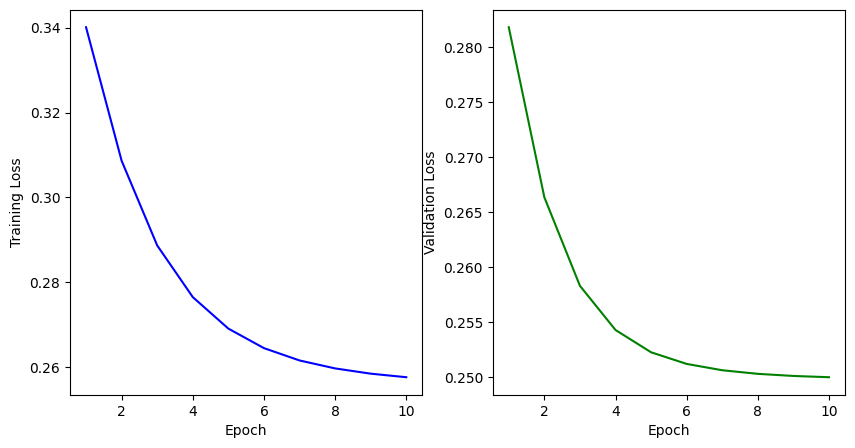

after [[-0.05901609]
 [-0.12714243]
 [ 0.04458561]
 [ 0.02676233]
 [-0.09452049]
 [-0.19719766]
 [-0.15604663]
 [-0.0702676 ]
 [-0.17945129]
 [ 0.08078485]]


In [9]:
np.random.seed(42)
a = Sequential(usage=Usage.logisticRegression)
a.add_layer(Flatten(input_shape=(28, 28)))
a.add_layer(Dense(in_features=28*28, out_features=128, activation="sigmoid", load_weights=model.layers[1].get_weights()))
a.add_layer(Dense(in_features=128, out_features=1, activation="sigmoid", load_weights=model.layers[2].get_weights()))
a.compile(loss_fn=Loss("l2"), learning_rate=0.01)
#a.summary()
print(a.layers[-1].kernel[:10])
a.train(input_train, y_train, nepochs=10, batch_size=128)
print("after", a.layers[-1].kernel[:10])
#a.evaluate(input_test, y_test)
# Momentum(0.9, lr=0.01) - Adagrad(lr=0.01) - RMSprop(0.6, lr=0.01) - Adam(0.9, 0.999, lr=0.01)

In [11]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128)
print("after ", model.layers[2].get_weights()[0][:10])
g='''
[[-0.06496951]
 [-0.13436106]
 [ 0.03470937]
 [ 0.01257588]
 [-0.1103922 ]
 [-0.20385358]
 [-0.16345188]
 [-0.07864687]
 [-0.18559916]
 [ 0.07660189]]
'''

Epoch 1/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.4960
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.4990
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.4950
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.4950
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.5050
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.5050
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.5120
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.5070
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.5090
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.5170
after  [[-0.06496951]
 [-0.13436106]
 [